<a href="https://colab.research.google.com/github/billzyx/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

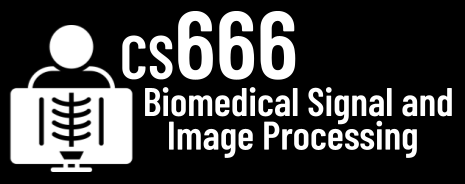

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 1.9 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
!wget https://cs666.org/data/ecg.txt 

from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

--2023-02-07 21:10:33--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘ecg.txt’

ecg.txt             100%[===================>] 102.62K  --.-KB/s    in 0.02s   

2023-02-07 21:10:34 (4.79 MB/s) - ‘ecg.txt’ saved [105085/105085]



**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
SAMPLING_RATE = 1000 ### TODO!
SECONDS = 15000 / SAMPLING_RATE ### TODO!

SECONDS

15.0

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
### TODO

from biosppy.signals.ecg import ecg

ecg_result = ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

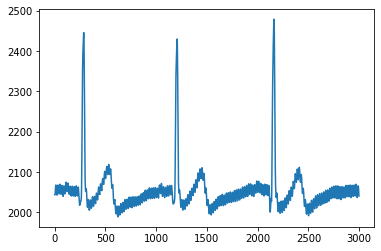

In [ ]:
### TODO plot unfiltered signal

plt.plot(signal[:3*SAMPLING_RATE])

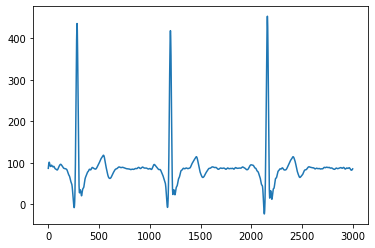

In [ ]:
### TODO plot filtered signal
filtered = ecg_result[1]
plt.plot(filtered[:3*SAMPLING_RATE])

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

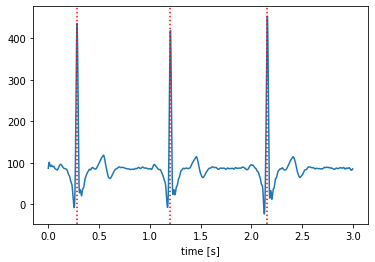

In [ ]:
### TODO
rpeaks = ecg_result[2]
rpeaks
plt.plot(np.arange(0, 3, 1/SAMPLING_RATE), filtered[:3*SAMPLING_RATE])
plt.xlabel("time [s]")
for n in rpeaks:
  if n > 3*SAMPLING_RATE:
    break
  plt.axvline(x = n/SAMPLING_RATE, color = 'r', ls=':')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.6 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


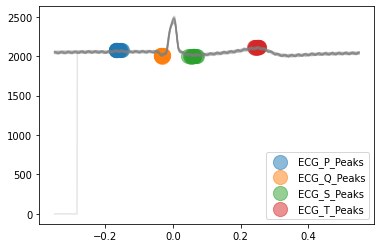

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Does the detection work well?

# It works so so. S is not well detected.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

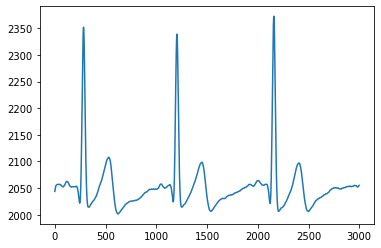

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

signal_filtered = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=None, highcut=20,)
plt.plot(signal_filtered[:3*SAMPLING_RATE])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


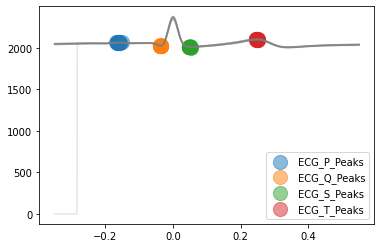

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

_, waves_peak = nk.ecg_delineate(signal_filtered, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Which one works the best?

# The one after the filtering

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#